# 타이타닉 탑승객 생존 예측 
Classification with Python

### 1. 데이터 불러오고 처리하기

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기
data = pd.read_csv('03Titanic_dataset.csv')

In [3]:
# 데이터 확인하기
data.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# 데이터 파악하기
data.shape

(1309, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   gender     1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
data.describe(include = 'all')

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


* pclass : 선실등급
* survivied ( = target)
* sibsp : 함께 탑승한 형제 또는 배우자 수
* parch : 부모 또는 자녀수
* ticket : 티켓 등급
* fare : 요금
* cabin : 선실
* embarked : 탑승 장속
* boat : 생존 경우 타고 난 보트
* body : 몸에 대한 것?
* home.dest : 최종 목적지

In [7]:
# 3. 빠진 값 확인
data.isnull().sum()

pclass          0
survived        0
name            0
gender          0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [8]:
# 결측치가 10% 이상인 열의 정보 가져오기
data.loc[:, data.isnull().sum() > 1309*0.1].describe(include = 'all')

,age,cabin,boat,body,home.dest
count,1046.000000,295,486,121.000000,745
unique,NaN,186,27,NaN,369
top,NaN,C23 C25 C27,13,NaN,"New York, NY"
freq,NaN,6,39,NaN,64
mean,29.881135,NaN,NaN,160.809917,NaN
std,14.413500,NaN,NaN,97.696922,NaN
min,0.166700,NaN,NaN,1.000000,NaN
25%,21.000000,NaN,NaN,72.000000,NaN
50%,28.000000,NaN,NaN,155.000000,NaN
75%,39.000000,NaN,NaN,256.000000,NaN


* age의 경우는 결측치가 10% 이상이지만 결측 대체하여 사용
* cabin는 탐색 후 삭제 여부 결정
*  boat는 생존자의 경우 어떤 보트를 탔는지이므로 생존하지 않은 경우에 대해 null 값이 있는 것이므로 칼럼 삭제 후 진행
* body는 신체 정보에 대한 것이므로 삭제 후 진행
* 목적지와 승착장의 생존 여부 관계 파악 후 삭제 결정
* ticket도 고유발행 번호같은 것이므로 삭제함

In [9]:
feature = data.copy().drop(['survived'], axis = 1)
target = data.copy()['survived']

In [10]:
# cabin 결측치 대체하기
feature['cabin'] = feature['cabin'].fillna('N') # null 값에 'N' 대입
feature.isnull().sum()

pclass          0
name            0
gender          0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin           0
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [11]:
feature['cabin'].head(40)

0          B5
1     C22 C26
2     C22 C26
3     C22 C26
4     C22 C26
5         E12
6          D7
7         A36
8        C101
9           N
10    C62 C64
11    C62 C64
12        B35
13          N
14        A23
15          N
16    B58 B60
17    B58 B60
18        D15
19         C6
20        D35
21        D35
22       C148
23          N
24        C97
25          N
26        B49
27        B49
28        C99
29        C52
30          T
31        A31
32         C7
33       C103
34        D22
35          N
36        E33
37          N
38        A21
39        B10
Name: cabin, dtype: object

In [12]:
data.loc[1,'cabin']

'C22 C26'

In [13]:
#feature['cabin_flg'] = 0 
for i in range(0,1309):
    feature.loc[i,'cabin_flg'] = feature.loc[i,'cabin'][0]

In [14]:
feature['cabin_flg'].unique()

array(['B', 'C', 'E', 'D', 'A', 'N', 'T', 'F', 'G'], dtype=object)

<AxesSubplot:xlabel='cabin_flg', ylabel='count'>

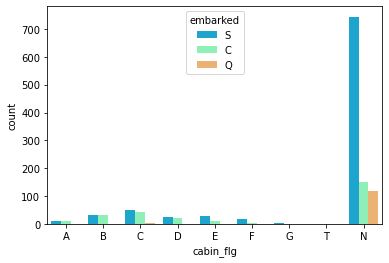

In [15]:
import seaborn as sns
sns.countplot(x = 'cabin_flg', hue = 'embarked', palette= 'rainbow', order=['A','B','C','D','E','F','G','T','N'], data=feature)

<AxesSubplot:xlabel='cabin_flg', ylabel='count'>

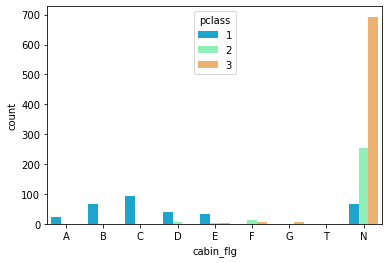

In [16]:
import seaborn as sns
sns.countplot(x = 'cabin_flg', hue = 'pclass', palette= 'rainbow', order=['A','B','C','D','E','F','G','T','N'], data=feature)

1등급 승객들은 비교적 객실 번호 데이터의 값이 있으나, 3등급 승객들의 데이터는 대부분 missing되었다.  
3등급 승객의 데이터를 제대로 기록을 하지 않았거나, 3등급 승객은 객실이 없었을 수도 있을 것 같다...일종의 입석처럼?  
그러나 A~E로 시작되는 cabin에는 1등급 승객만 있으며, 다른 객실에는 거의 정보가 없으니 해당 칼럼은 삭제할 것이다.  

In [17]:
# 불필요한 컬럼 삭제
feature.drop(['boat', 'body', 'ticket', 'cabin'], axis = 1, inplace = True)

### 1-1. Train/Test 셋 분리 먼저 진행

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 1234)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)


X_train: (1047, 10)
y_train: (1047,)
X_test: (262, 10)
y_test: (262,)


### 1-2. 결측치 처리하기

In [19]:
feature.isnull().sum()

pclass         0
name           0
gender         0
age          263
sibsp          0
parch          0
fare           1
embarked       2
home.dest    564
cabin_flg      0
dtype: int64

In [20]:
# 5. Impute - Fare
feature['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [21]:
data['fare'].isnull().sum()

1

평균이 33인데, 표준편차가 51이므로 평균 대체이전에 요금의 분포를 먼저 파악해 봄!

In [46]:
#index = 3이 pcalss = 3
X_test.loc[X_test['fare'].isnull(), 'fare'] =X_train.groupby(by = 'pclass', dropna=True).mean()['fare'][3]

In [48]:
# 나이 결측치 대체하기
X_train['age'].describe()

count    844.000000
mean      29.883096
std       14.367259
min        0.166700
25%       21.000000
50%       28.000000
75%       38.625000
max       80.000000
Name: age, dtype: float64

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

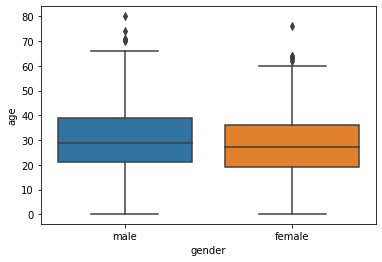

In [23]:
sns.boxplot(x='gender', y='age', data=X_train)
plt.show()

여성과 남성의 요금 차이는 크지 않음

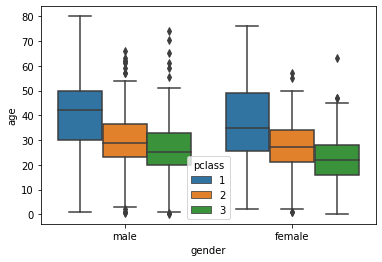

In [24]:
sns.boxplot(x='gender', y='age', hue='pclass', data=X_train)
plt.show()

pclass에 따라 요금 차이가 큼

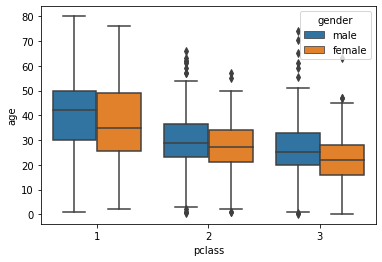

In [60]:
sns.boxplot(x='pclass', y='age', hue='gender', data=X_train)
plt.show()

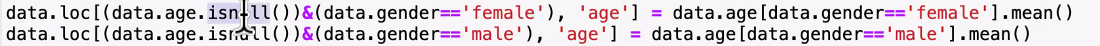

In [81]:
def groupby_f_impute(df,col_imputed, col_grouped, group_class):
    for i in group_class:
        df.loc[(df[col_imputed].isnull())&(df[col_grouped] == i), col_imputed] = df[col_imputed][df[col_grouped] == i].mean()

In [88]:
X_train.loc[(X_train.age.isnull())&(X_train.pclass == '1'), 'age'] = X_train.age[X_train.pclass == '1'].mode()
X_train.loc[(X_train.age.isnull())&(X_train.pclass == '2'), 'age'] = X_train.age[X_train.pclass == '2'].mode()
X_train.loc[(X_train.age.isnull())&(X_train.pclass == '3'), 'age'] = X_train.age[X_train.pclass == '3'].mode()


X_test.loc[(X_train.age.isnull())&(X_test.pclass == '1'), 'age'] = X_test.age[X_test.pclass == '1'].mode()
X_test.loc[(X_train.age.isnull())&(X_test.pclass == '2'), 'age'] = X_test.age[X_test.pclass == '2'].mode()
X_test.loc[(X_train.age.isnull())&(X_test.pclass == '3'), 'age'] = X_test.age[X_test.pclass == '3'].mode()

In [89]:
# 7. Impute - Embarked
X_train.isnull().sum()

pclass         0
name           0
gender         0
age          203
sibsp          0
parch          0
fare           0
embarked       2
home.dest    437
cabin_flg      0
dtype: int64

In [ ]:
# embarked 결측치 제거

In [90]:
X_train[X_train['embarked'].isnull()]

,pclass,name,gender,age,sibsp,parch,fare,embarked,home.dest,cabin_flg
168,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN,NaN,B
284,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN,"Cincinatti, OH",B


In [ ]:
sns.countplot(x = 'embarked', palette= 'rainbow', data=feature)

In [ ]:
sns.countplot(x = 'embarked', hue = 'pclass', palette= 'rainbow', data=feature)

그냥 embarked는 최빈값인 s로 처리

In [ ]:
# 최빈값으로 처리

X_train['embarked'] = X_train['embarked'].fillna(X_train['embarked'].mode()[0])
X_train.isnull().sum()

In [ ]:
# 8. Feature Heatmap 시각화 (x/y 분리되어 잇으면 안됨)
sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [ ]:
# 8-1. 시각화 - 성별에 따른 생존자 수
sns.countplot(x = 'gender', hue = data['survived'], palette= 'rainbow', data=feature)

In [ ]:
# 8-2 시각화 - 선실 등급에 따른 생존여부
sns.countplot(x = 'pclass', hue = data['survived'], palette= 'Paired', data=feature)

In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

In [ ]:
X_test.iloc[:,[1,6,7]]

In [ ]:
sns.countplot(x='cabin_flg',  data=X_test)
plt.show()

In [ ]:
sns.countplot(x='cabin_flg',  data=X_train)
plt.show()

In [ ]:
# T인 값이 하나만 있어서 원핫인코딩시 어레이 열 개수 오류가 생겨, cabin과 pclass와 연관성이 있는 것 같아 우선 C로 대체
X_train.loc[X_train['cabin_flg']=='T','cabin_flg'] = 'C'

In [ ]:
sns.countplot(x='cabin_flg',  data=X_train)
plt.show()

In [ ]:
# 10. 데이터 변환(one hot encoding)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


def f_ohe(DF, columns): # data frame과 해당 열
    ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), columns)], 
                      remainder = 'passthrough')
    DF = ct.fit_transform(DF)
    return DF

In [ ]:
X_train = f_ohe(X_train, [1,6,7])

In [ ]:
X_test = f_ohe(X_test, [1,6,7])

### 모델링

In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

In [ ]:
# 12. 모델 학습
from sklearn.linear_model import LogisticRegression  #로지스틱회귀
from sklearn.tree import DecisionTreeClassifier      #의사결정트리
from sklearn.ensemble import RandomForestClassifier  #랜덤포레스트

lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(random_state=0)
#lr_clf = LogisticRegression()

In [ ]:
clf_lst = [lr_clf, dt_clf, rf_clf]

def clf_fit(clf, X_train, y_train):
    return clf.fit(X_train, y_train)
    
for clf in clf_lst:
    clf_fit(clf, X_train, y_train)

In [ ]:
# 13. 모델 성능 확인(evaluate)
lr_clf_pred = lr_clf.predict(X_test)
dt_clf_pred = dt_clf.predict(X_test)
rf_clf_pred = rf_clf.predict(X_test)

In [ ]:
# classification report
from sklearn.metrics import classification_report
print('logit regression: \n', classification_report(y_test, lr_clf_pred))
print('Decision Tree: \n',classification_report(y_test, dt_clf_pred))
print('RandomForest: \n',classification_report(y_test, rf_clf_pred))

😊

# cross validation

In [ ]:
# 동일하게 전처리 진행

In [ ]:
# cross validation
from sklearn.model_selection import KFold, cross_val_score

# random_state가 들어가지만 5번 진행해서 신뢰도를 높이는 것
data_kf = KFold(n_splits = 10, shuffle = True, random_state = 9)

score = cross_val_score(rf_clf, feature, target, cv = data_kf, scoring = 'accuracy')

print('10 fold acc :', score)
print('Mean Acc :', score.mean())